In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
telemetry=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_telemetry.csv")
machines=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_machines.csv")
maintenance=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_maint.csv")
failures=  pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_failures.csv")
errors=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_errors.csv")

In [4]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [5]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [6]:
maintenance.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [7]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [8]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


### EDA of telemetry

In [10]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [11]:
telemetry["datetime"].describe()

count                  876100
unique                   8761
top       2015-01-01 06:00:00
freq                      100
Name: datetime, dtype: object

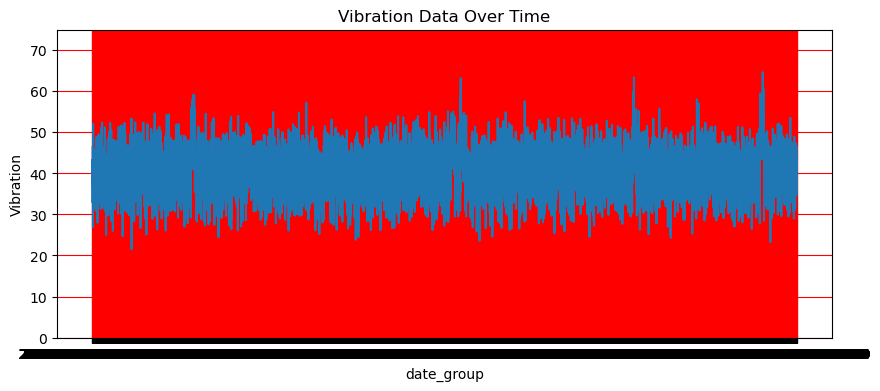

In [12]:
# plot vibration of machine 50 for year 2015
import matplotlib.dates as mdates
vib=telemetry[telemetry.machineID == 50][["vibration","datetime"]].set_index("datetime")
plt.figure(figsize=(10,4))
plt.plot(vib)
plt.xlabel('date_group')
plt.ylabel("Vibration")
plt.ylim(0, 75)
plt.grid(color="r")
plt.title("Vibration Data Over Time")
plt.show()

<Axes: title={'center': 'volt'}, ylabel='date_group'>

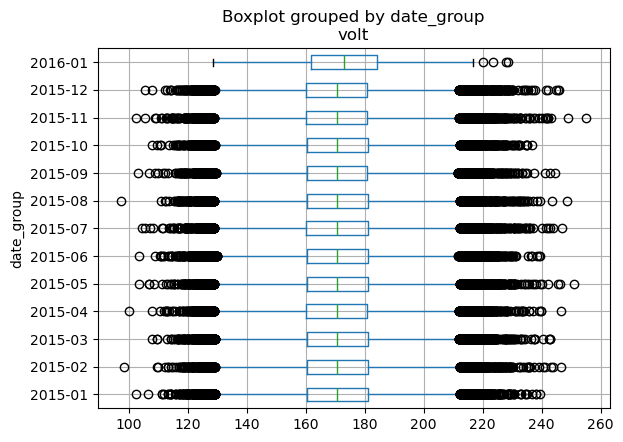

In [13]:
telemetry["datetime"] = pd.to_datetime(telemetry["datetime"])
    
    # Create a new column to group by month (or any other time period)
telemetry['date_group'] = telemetry["datetime"].dt.to_period('M')  # Grouping by month; adjust as needed

telemetry.boxplot(column="volt", by='date_group', vert=False)

array([[<Axes: title={'center': 'volt'}>]], dtype=object)

<Figure size 1000x700 with 0 Axes>

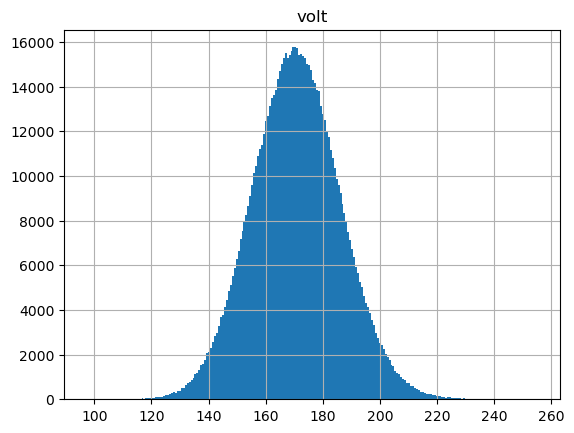

In [14]:
plt.figure(figsize=(10,7))
telemetry.hist(column="volt",bins=230,log=False)

In [15]:
import pandas as pd
from scipy import stats

def A_D(column):
    # Assuming 'telemetry' is your DataFrame and it contains a 'volt' column
    volt_data = telemetry['volt'].dropna()  # Drop any NaN values to avoid errors
    
    # Perform the Anderson-Darling test
    result = stats.anderson(volt_data, dist='norm')
    
    # Extract the test statistic and critical values
    ad_statistic = result.statistic
    critical_values = result.critical_values
    significance_level = result.significance_level
    
    # Print the results
    print(f"Test Statistic: {ad_statistic}")
    print("Critical Values:")
    for cv, sl in zip(critical_values, significance_level):
        print(f"   {sl:.1f}%: {cv}")
    
    # Check if the test statistic is greater than the critical value at 5% significance level
    alpha = 0.05
    if ad_statistic > critical_values[2]:  # The third critical value corresponds to 5%
        print("Reject H0: The data set is not drawn from a normal distribution.")
    else:
        print("Fail to reject H0: The data set is drawn from a normal distribution.")

A_D("volt")

Test Statistic: 61.562841688632034
Critical Values:
   15.0%: 0.576
   10.0%: 0.656
   5.0%: 0.787
   2.5%: 0.918
   1.0%: 1.092
Reject H0: The data set is not drawn from a normal distribution.


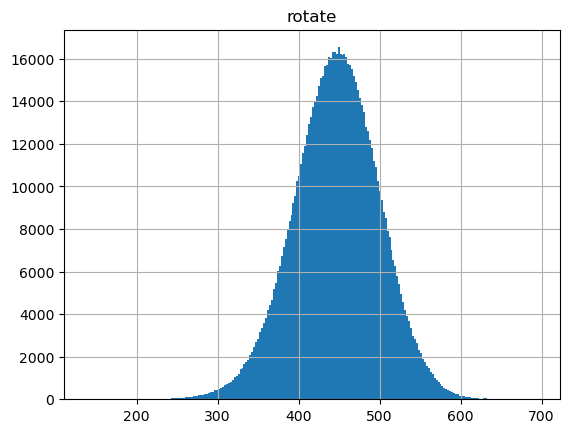

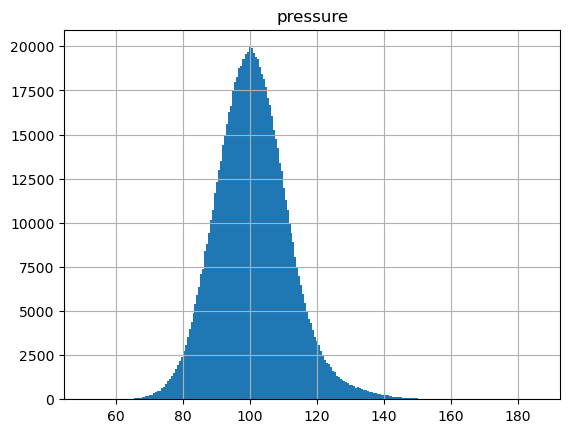

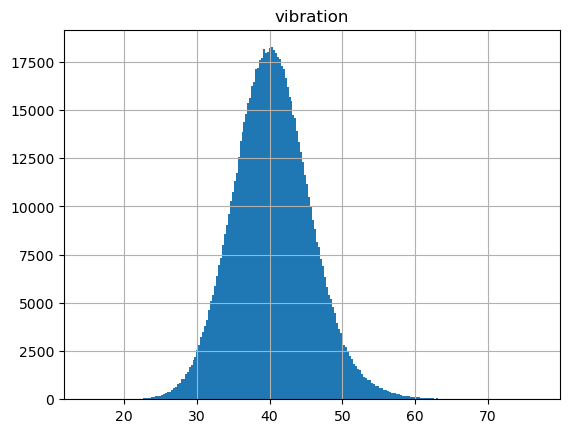

In [16]:
for i in ["rotate","pressure","vibration"]:
   telemetry.hist(column=i,bins=230,log=False) 


In [17]:
for i in ["rotate","pressure","vibration"]:
    A_D(i)

Test Statistic: 61.562841688632034
Critical Values:
   15.0%: 0.576
   10.0%: 0.656
   5.0%: 0.787
   2.5%: 0.918
   1.0%: 1.092
Reject H0: The data set is not drawn from a normal distribution.
Test Statistic: 61.562841688632034
Critical Values:
   15.0%: 0.576
   10.0%: 0.656
   5.0%: 0.787
   2.5%: 0.918
   1.0%: 1.092
Reject H0: The data set is not drawn from a normal distribution.
Test Statistic: 61.562841688632034
Critical Values:
   15.0%: 0.576
   10.0%: 0.656
   5.0%: 0.787
   2.5%: 0.918
   1.0%: 1.092
Reject H0: The data set is not drawn from a normal distribution.


### EDA of errors

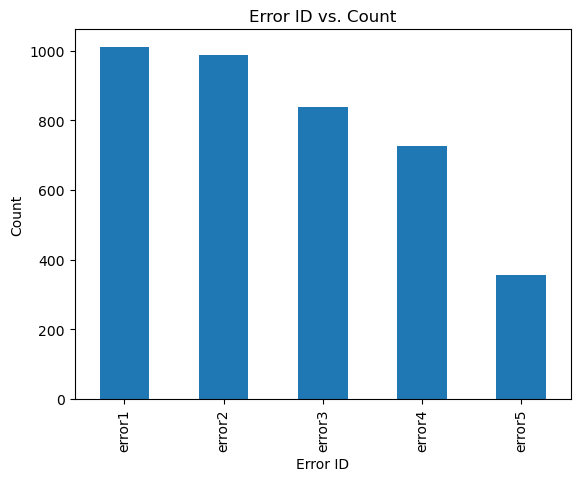

In [19]:
errors['errorID'].value_counts().plot(kind='bar')
plt.xlabel('Error ID')
plt.ylabel('Count')
plt.title('Error ID vs. Count')
plt.show()

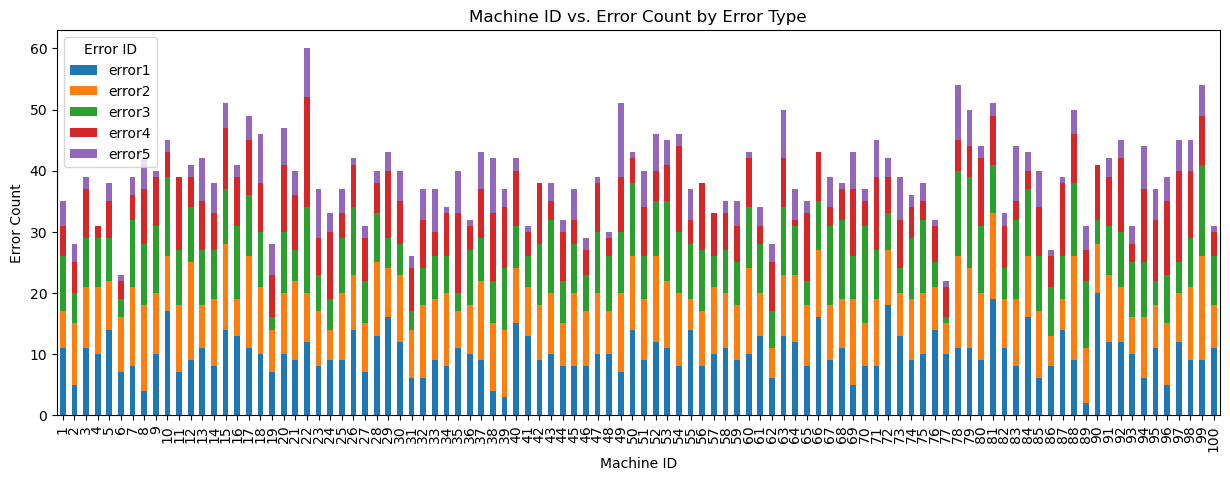

In [20]:
error_counts = errors.pivot_table(index='machineID', columns='errorID', aggfunc='size', fill_value=0)

# Plotting the stacked bar chart
error_counts.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.xlabel('Machine ID')
plt.ylabel('Error Count')
plt.title('Machine ID vs. Error Count by Error Type')
plt.legend(title='Error ID')
plt.show()

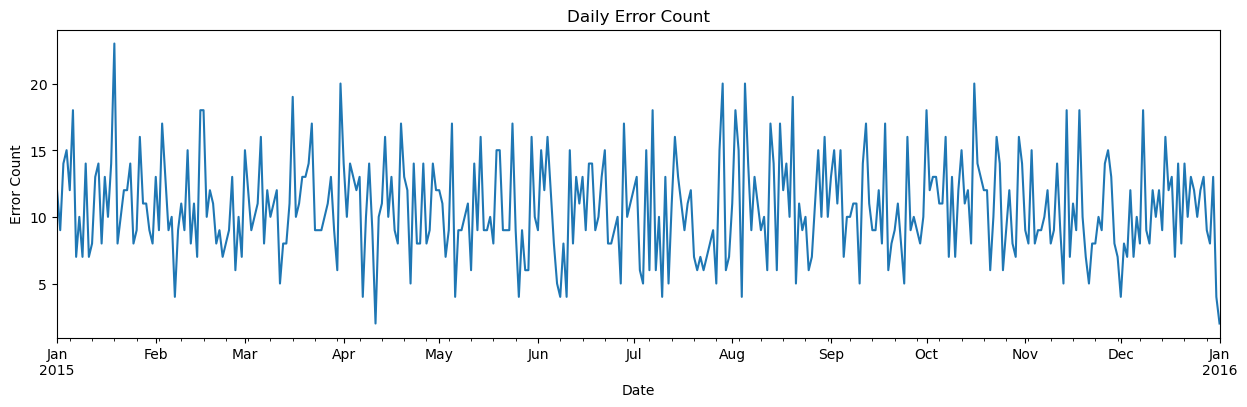

In [21]:


# Convert 'datetime' to pandas datetime format if it isn't already
errors['datetime'] = pd.to_datetime(errors['datetime'])

# Create a temporary DataFrame with 'datetime' as the index for resampling
temp_df = errors.set_index('datetime')

# Resample by day and count errors
daily_error_counts = temp_df.resample('D')['errorID'].count()

# Plotting the daily error count as a line plot
plt.figure(figsize=(15,4))
daily_error_counts.plot(kind="line", title="Daily Error Count")
plt.xlabel("Date")
plt.ylabel("Error Count")
plt.show()

### EDA on maintenance

In [23]:
maintenance.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


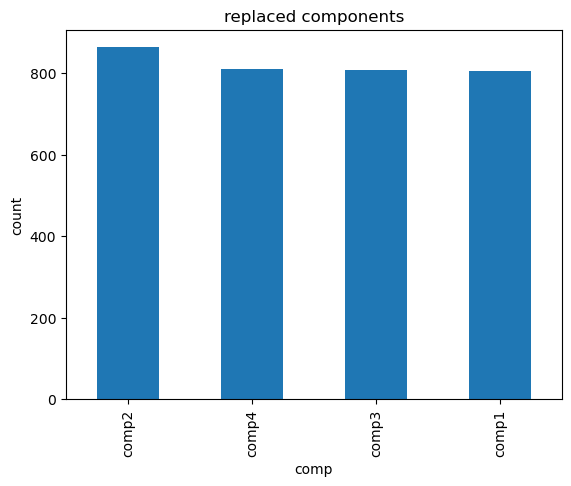

In [24]:
maintenance["comp"].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.title("replaced components")
plt.show()

/var/folders/qn/kq8sg40148x2sxk_3k418fmh0000gn/T/ipykernel_3080/3619123976.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_main=temp_main.resample('M')["comp"].count()


<Axes: title={'center': 'no. of maintenance records'}, xlabel='datetime'>

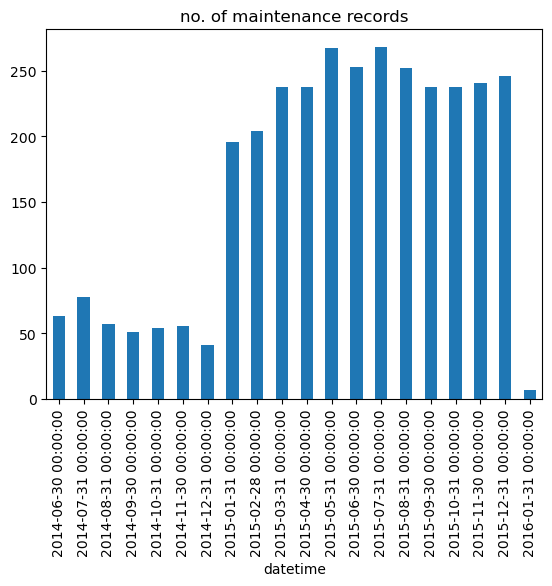

In [25]:
maintenance["datetime"]=pd.to_datetime(maintenance["datetime"])
temp_main=maintenance.set_index("datetime")
temp_main=temp_main.resample('M')["comp"].count()
temp_main.plot(kind="bar",title="no. of maintenance records")

<Axes: title={'center': 'no. of components replaced per machine'}, xlabel='machineID'>

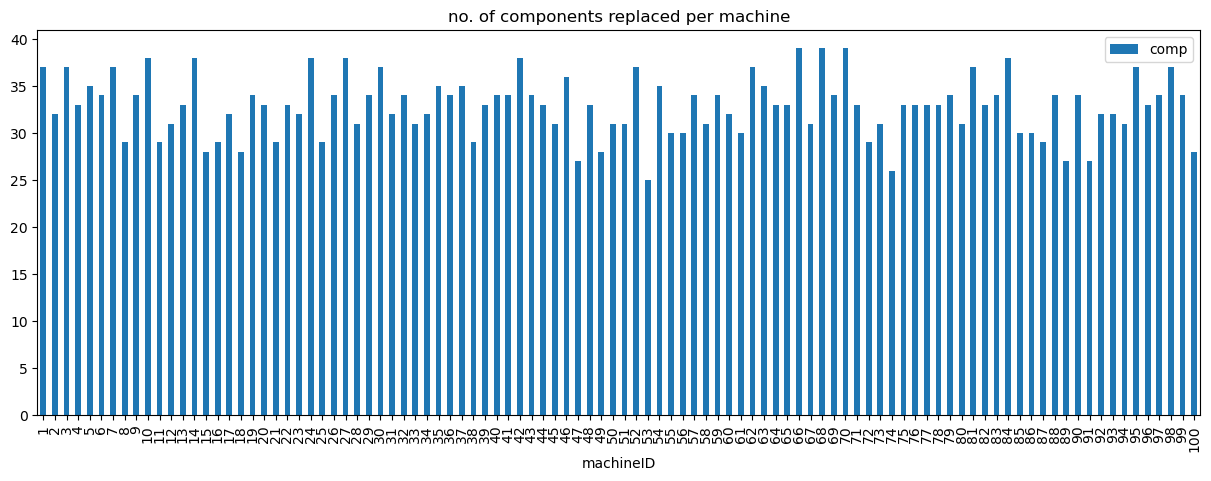

In [26]:
main_count=maintenance.groupby("machineID")["comp"].count()
plt.figure(figsize=(15,5))

main_count.plot(legend=True,kind="bar",title="no. of components replaced per machine")

Text(0, 0.5, 'Count of Maintenance Issues')

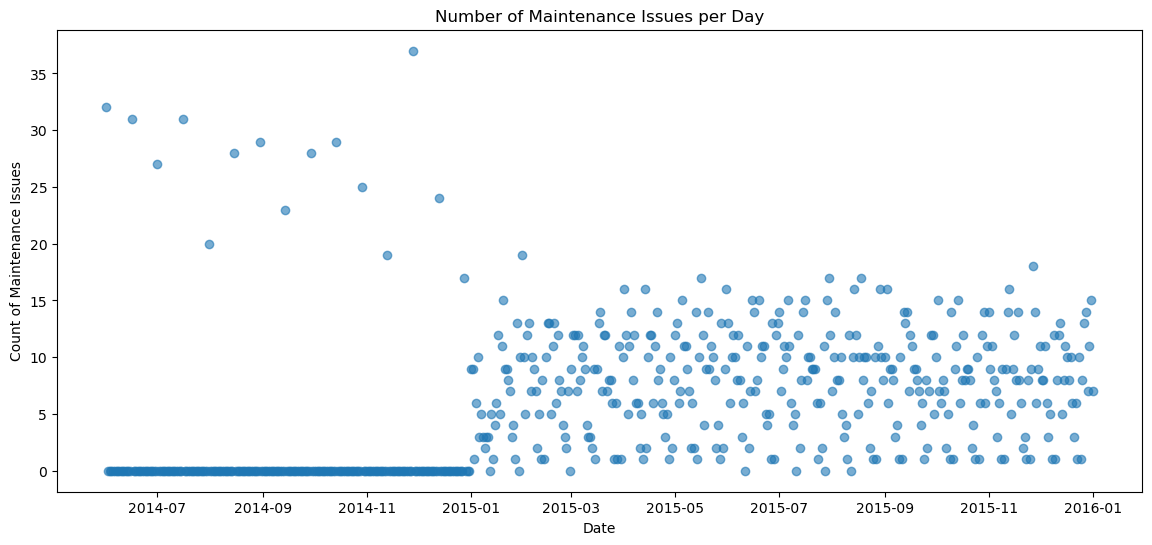

In [27]:
main_day=maintenance
main_day["date_group"]=main_day["datetime"].dt.to_period('M')
main_day=maintenance.set_index("datetime")
main_day = main_day.resample("D")["comp"].count().reset_index()

# Now, main_day is a DataFrame with 'datetime' and 'comp' count
main_day.columns = ['datetime', 'count']  # Rename for clarity

# Plotting the data
plt.figure(figsize=(14, 6))
plt.scatter(main_day['datetime'], main_day['count'], alpha=0.6)
plt.title("Number of Maintenance Issues per Day")
plt.xlabel("Date")
plt.ylabel("Count of Maintenance Issues")

### EDA of machines

In [29]:
machines.head(10)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
5,6,model3,7
6,7,model3,20
7,8,model3,16
8,9,model4,7
9,10,model3,10


<Axes: title={'center': 'no. of models compared to age'}, xlabel='age'>

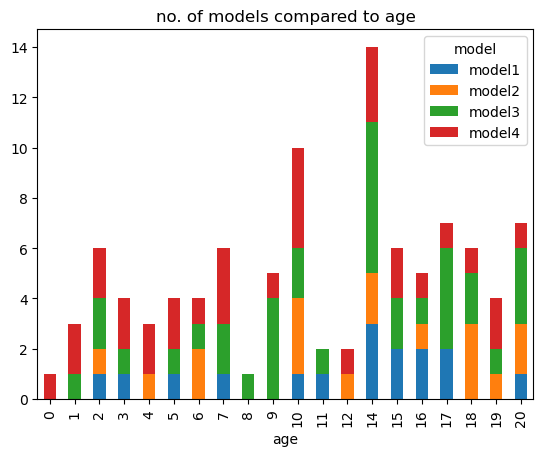

In [30]:
mach=machines.pivot_table(index="age",columns="model",aggfunc="size",fill_value=0)
mach.plot(kind="bar",title="no. of models compared to age",stacked=True)

### Creating DF with no.(errors,failures,maintenance) with machines

In [32]:
error_no=errors.groupby("machineID").size()
error_no=pd.DataFrame(error_no,columns=["error_count"]).reset_index()
machine_sam_Df=pd.merge(machines,error_no,how="left",on="machineID")

maintenance_no=maintenance.groupby("machineID").size()
maintenance_no=pd.DataFrame(maintenance_no,columns=["maint_count"]).reset_index()
machine_sam_Df=pd.merge(machine_sam_Df,maintenance_no,how="left",on="machineID")

failure_no=failures.groupby("machineID").size()
failure_no=pd.DataFrame(failure_no,columns=["failure_count"]).reset_index()
machine_sam_Df=pd.merge(machine_sam_Df,failure_no,how="left",on="machineID")

In [33]:
machine_sam_Df

,machineID,model,age,error_count,maint_count,failure_count
0,1,model3,18,35,37,7.0
1,2,model4,7,28,32,4.0
2,3,model3,8,39,37,5.0
3,4,model3,7,31,33,6.0
4,5,model3,2,38,35,7.0
...,...,...,...,...,...,...
95,96,model2,10,39,33,5.0
96,97,model2,14,45,34,8.0
97,98,model2,20,45,37,16.0
98,99,model1,14,54,34,19.0


In [34]:
machine_sam_Df.corr(numeric_only=True)

,machineID,age,error_count,maint_count,failure_count
machineID,1.000000,0.100196,0.107982,-0.077903,0.096496
age,0.100196,1.000000,0.106931,0.075445,0.476459
error_count,0.107982,0.106931,1.000000,-0.026558,0.483735
maint_count,-0.077903,0.075445,-0.026558,1.000000,-0.030258
failure_count,0.096496,0.476459,0.483735,-0.030258,1.000000


From the above table, it is observed that attribute 'age' and 'error_count' have correlation with failure_count.

### EDA of failures

In [37]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


<Axes: title={'center': 'no. of component failures per machine'}, xlabel='machineID'>

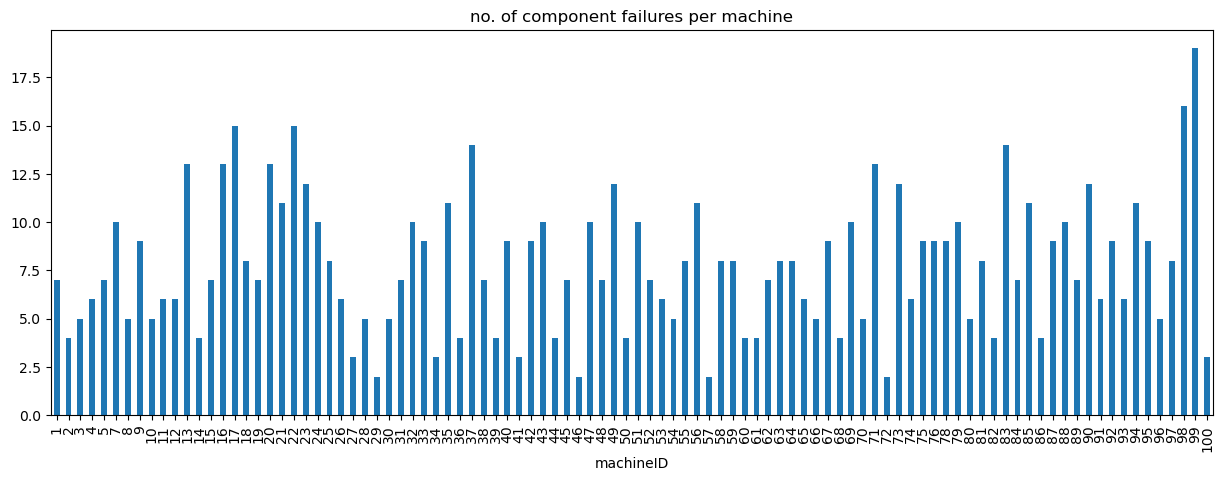

In [38]:
fail=failures.groupby("machineID")["failure"].count()
plt.figure(figsize=(15,5))
fail.plot(kind="bar",title="no. of component failures per machine",stacked=False)

Text(0.5, 1.0, 'Failure Counts by Type')

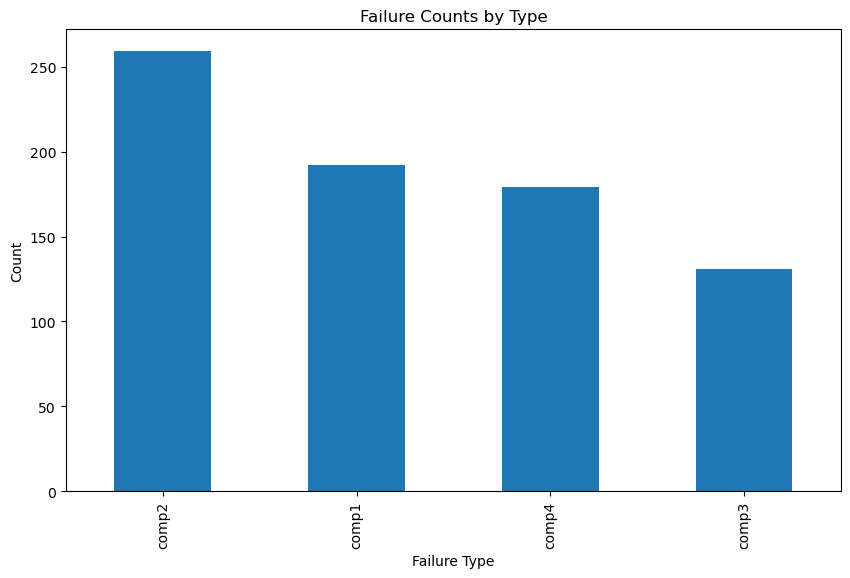

In [39]:
failure_counts = failures["failure"].value_counts()

plt.figure(figsize=(10, 6))
failure_counts.plot(kind="bar")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.title("Failure Counts by Type")

### Preparing a final DF


In [41]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")
telemetry["machineID"]=telemetry["machineID"].astype(int)

errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')
errors["machineID"]=errors["machineID"].astype(int)

maintenance['datetime'] = pd.to_datetime(maintenance['datetime'], format="%Y-%m-%d %H:%M:%S")
maintenance['comp'] = maintenance['comp'].astype('category')
maintenance["machineID"]=maintenance["machineID"].astype(int)

machines['model'] = machines['model'].astype('category')
machines["machineID"]=machines["machineID"].astype(int)

failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')
failures["machineID"]=failures["machineID"].astype(int)

In [42]:
errors.head

<bound method NDFrame.head of                 datetime  machineID errorID
0    2015-01-03 07:00:00          1  error1
1    2015-01-03 20:00:00          1  error3
2    2015-01-04 06:00:00          1  error5
3    2015-01-10 15:00:00          1  error4
4    2015-01-22 10:00:00          1  error4
...                  ...        ...     ...
3914 2015-11-21 08:00:00        100  error2
3915 2015-12-04 02:00:00        100  error1
3916 2015-12-08 06:00:00        100  error2
3917 2015-12-08 06:00:00        100  error3
3918 2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]>

In [43]:
errors=pd.get_dummies(errors)
error_df=telemetry[['datetime', 'machineID']].merge(errors, on=['machineID', 'datetime'], 
                                                         how='outer').fillna(0)


In [44]:
error_df.head(),error_df.shape


(             datetime  machineID errorID_error1 errorID_error2 errorID_error3  \
 0 2015-01-01 06:00:00          1              0              0              0   
 1 2015-01-01 07:00:00          1              0              0              0   
 2 2015-01-01 08:00:00          1              0              0              0   
 3 2015-01-01 09:00:00          1              0              0              0   
 4 2015-01-01 10:00:00          1              0              0              0   
 
   errorID_error4 errorID_error5  
 0              0              0  
 1              0              0  
 2              0              0  
 3              0              0  
 4              0              0  ,
 (876403, 7))

In [45]:
machines.columns

Index(['machineID', 'model', 'age'], dtype='object')

In [46]:
machines=pd.get_dummies(machines).astype(int)

mach_df=telemetry[[ 'machineID']].merge(machines, on=['machineID' ], 
                                                         how='outer').fillna(0)


In [47]:
mach_df.head(2),mach_df.shape

(   machineID  age  model_model1  model_model2  model_model3  model_model4
 0          1   18             0             0             1             0
 1          1   18             0             0             1             0,
 (876100, 6))

In [48]:
maintenance.columns

Index(['datetime', 'machineID', 'comp', 'date_group'], dtype='object')

In [49]:
maint=pd.get_dummies(maintenance)

In [50]:
# Check the column types before merging
print(telemetry['datetime'].dtype)
print(maint['datetime'].dtype)

# Convert both 'datetime' columns to datetime64[ns] if not already
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], errors='coerce')
maint['datetime'] = pd.to_datetime(maint['datetime'], errors='coerce')

# After conversion, check again
print(telemetry['datetime'].dtype)
print(maint['datetime'].dtype)

# Now perform the merge
maint_df = telemetry[['datetime', 'machineID']].merge(maint, on=['machineID', 'datetime'], how='outer').fillna(0)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [51]:
maint_df.head(),maint_df.shape

(             datetime  machineID date_group comp_comp1 comp_comp2 comp_comp3  \
 0 2014-06-01 06:00:00          1    2014-06      False       True      False   
 1 2014-07-16 06:00:00          1    2014-07      False      False      False   
 2 2014-07-31 06:00:00          1    2014-07      False      False       True   
 3 2014-12-13 06:00:00          1    2014-12       True      False      False   
 4 2015-01-01 06:00:00          1          0          0          0          0   
 
   comp_comp4  
 0      False  
 1       True  
 2      False  
 3      False  
 4          0  ,
 (877223, 7))

In [52]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [53]:
failure_df=telemetry[['datetime', 'machineID']].merge(failures, on=['machineID', 'datetime'], 
                                                         how='left')

In [54]:
merged_df=pd.merge(telemetry,machines, on=['machineID'], how='left').fillna(0)

In [55]:
merged_df=pd.merge(merged_df,maint_df, on=['machineID', 'datetime'], 
                                                         how='left').fillna(0)

In [56]:
merged_df=pd.merge(merged_df,error_df, on=['machineID', 'datetime'], 
                                                         how='left').fillna(0)

In [57]:
merged_df=pd.merge(merged_df,failure_df, on=['machineID', 'datetime'], 
                                                         how='left')

In [58]:
merged_df.head(2)

,datetime,machineID,volt,rotate,pressure,vibration,date_group_x,age,model_model1,model_model2,...,comp_comp1,comp_comp2,comp_comp3,comp_comp4,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01,18,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01,18,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [59]:
merged_df=merged_df.drop(["date_group_x","date_group_y"],axis=1)

In [60]:
merged_df.shape


(877209, 21)

In [61]:
merged_df['failure'] = merged_df['failure'].astype('str')
merged_df.replace({'nan': "none"}, inplace= True)

In [62]:
merged_df.to_csv("/Users/nihaalnadaf/Downloads/archive/merged_df.csv")

In [63]:
X = merged_df.drop(['datetime', 'machineID', 'failure'], axis=1)

In [64]:
X.head(2)

,volt,rotate,pressure,vibration,age,model_model1,model_model2,model_model3,model_model4,comp_comp1,comp_comp2,comp_comp3,comp_comp4,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,176.217853,418.504078,113.077935,45.087686,18,0,0,1,0,0,0,0,0,0,0,0,0,0
1,162.879223,402.747490,95.460525,43.413973,18,0,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
X_final_train = X.values
X_final_train[1],len(X_final_train)

(array([162.87922289706, 402.747489565395, 95.4605253823187,
        43.4139726834815, 18, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=object),
 877209)

In [66]:
y_final=merged_df['failure']
y_final.head(2)

0    none
1    none
Name: failure, dtype: object

In [67]:
y_final_train = y_final.values
y_final_train[1]

'none'

In [68]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y_final_train = label_encoder.fit_transform(y_final_train)



In [69]:
np.unique(y_final_train)

array([0, 1, 2, 3, 4])

In [70]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_final_train, y_final_train,test_size=0.20, shuffle=False)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, shuffle=False)

In [72]:
print('X_train Observations: %d' % (len(X_train)))
print('y_train Observations: %d' % (len(y_train)))

print('X_cv Observations: %d' % (len(X_cv)))
print('y_cv Observations: %d' % (len(y_cv)))

print('X_test Observations: %d' % (len(X_test)))
print('y_test Observations: %d' % (len(y_test)))

X_train Observations: 561413
y_train Observations: 561413
X_cv Observations: 140354
y_cv Observations: 140354
X_test Observations: 175442
y_test Observations: 175442


In [73]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = ['comp1', 'comp2', 'comp3', 'comp4', 'none']
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Applying model XGBClassifier

In [75]:
from xgboost import XGBClassifier

x_cfl=XGBClassifier()
x_cfl.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

-------------------- Confusion matrix --------------------


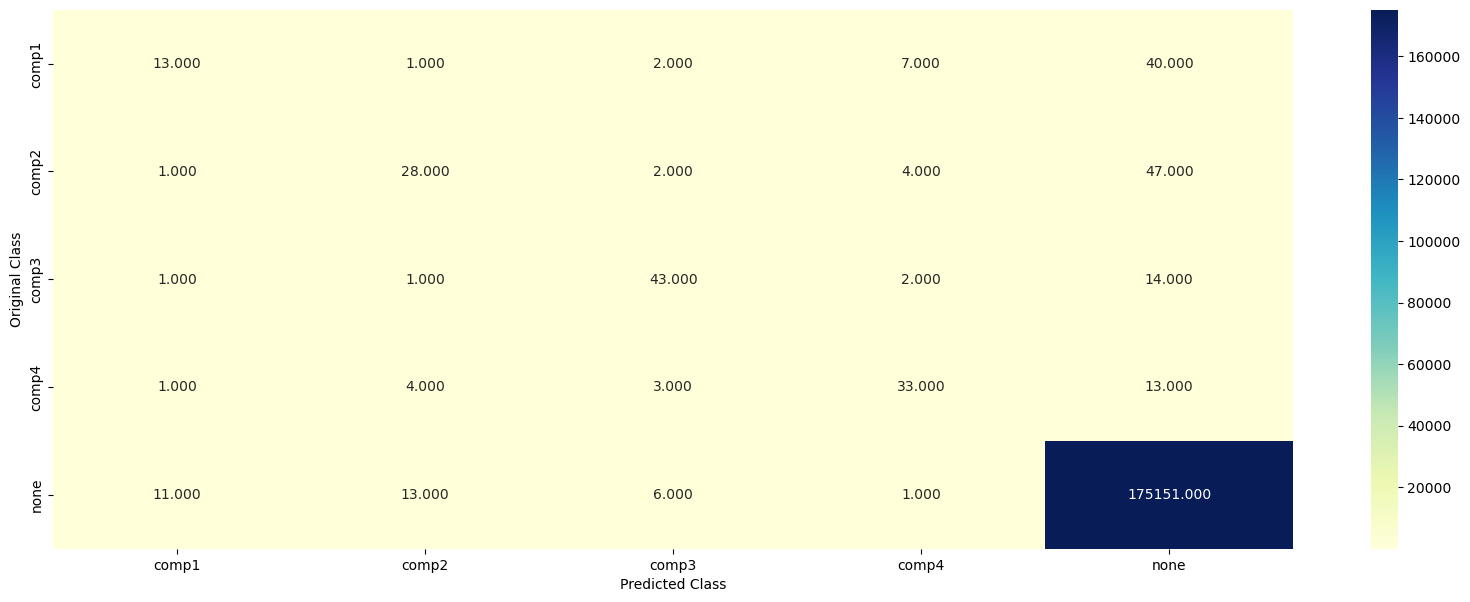

-------------------- Precision matrix (Columm Sum=1) --------------------


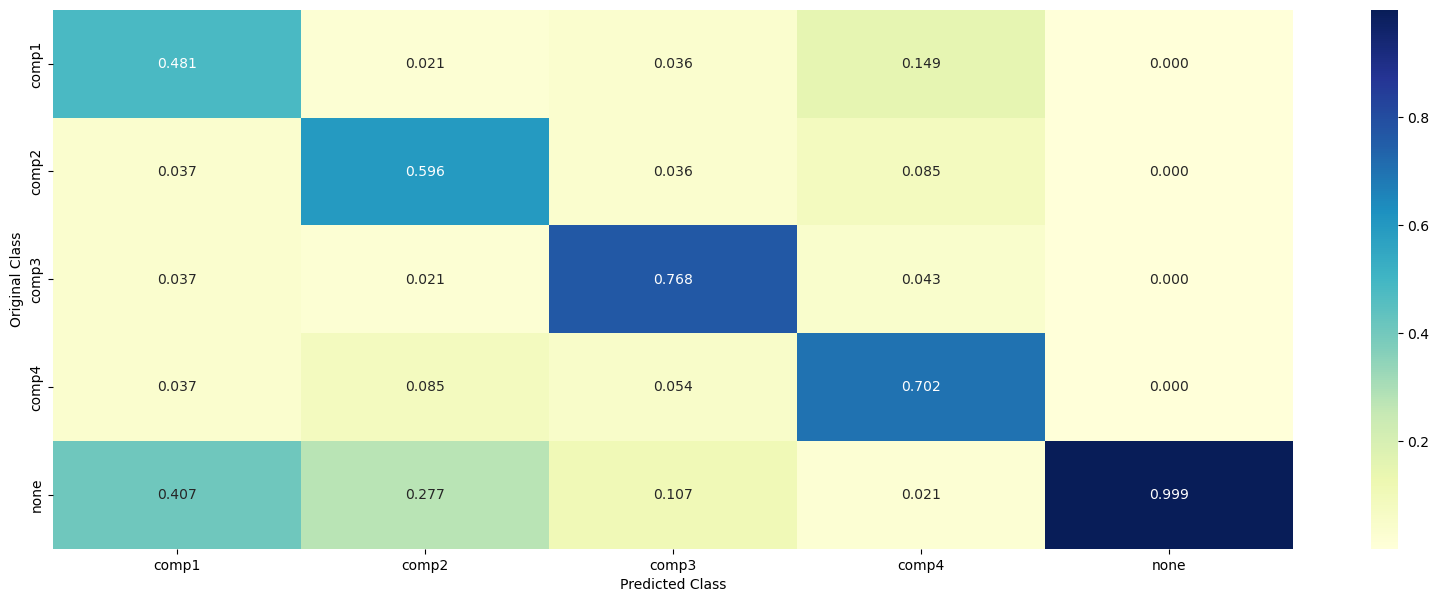

-------------------- Recall matrix (Row sum=1) --------------------


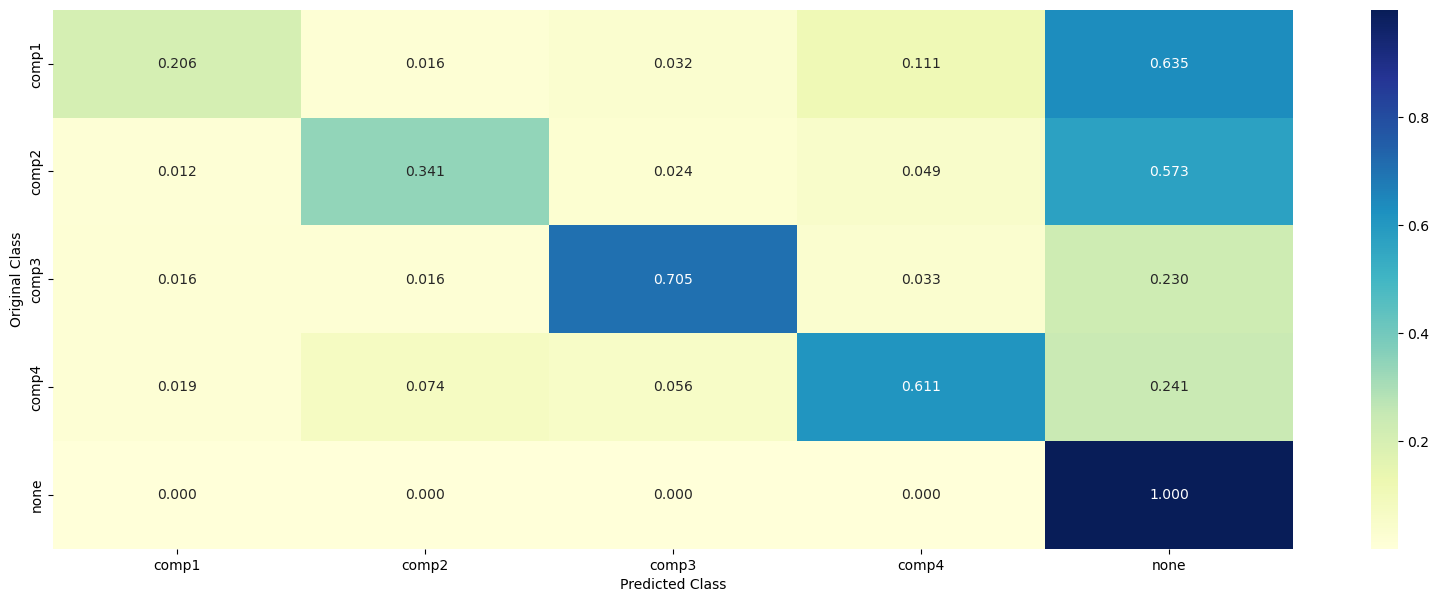

In [76]:
plot_confusion_matrix(y_test, x_cfl.predict(X_test))

In [77]:
%%time
from sklearn.ensemble import RandomForestClassifier

r_cfl=RandomForestClassifier(n_jobs=-1)
r_cfl.fit(X_train,y_train)

CPU times: user 1min 59s, sys: 1.19 s, total: 2min
Wall time: 16.6 s


RandomForestClassifier(n_jobs=-1)

-------------------- Confusion matrix --------------------


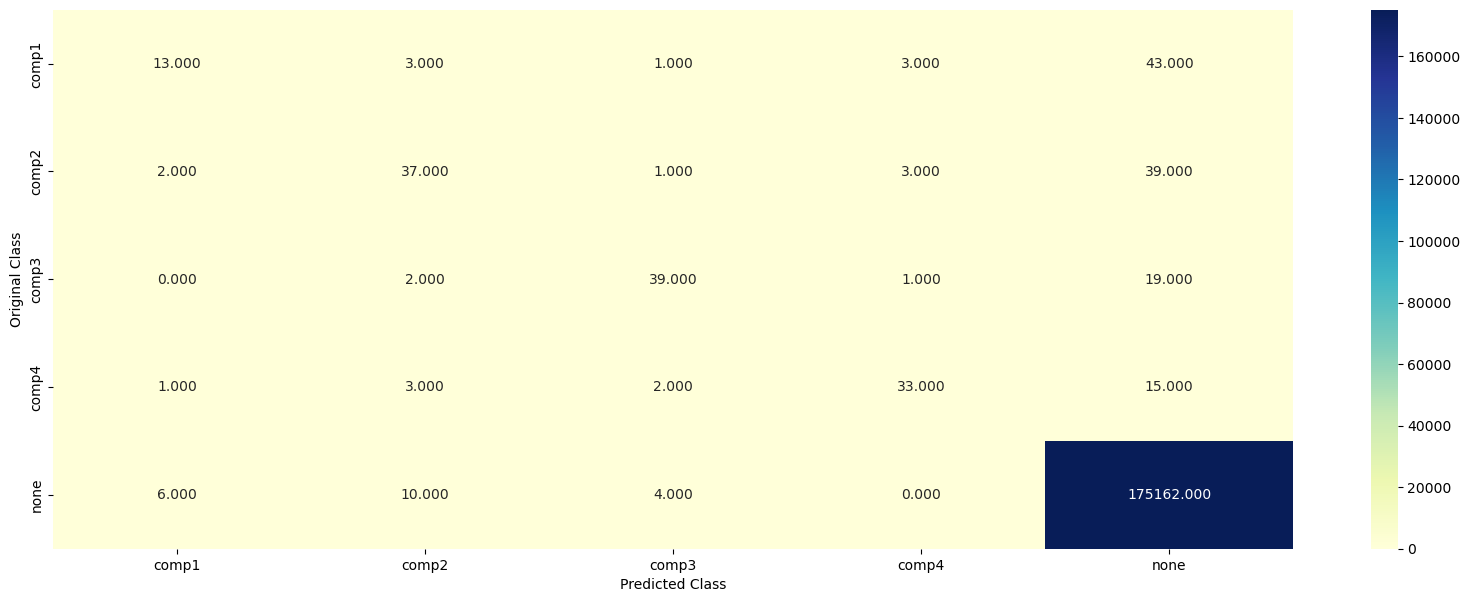

-------------------- Precision matrix (Columm Sum=1) --------------------


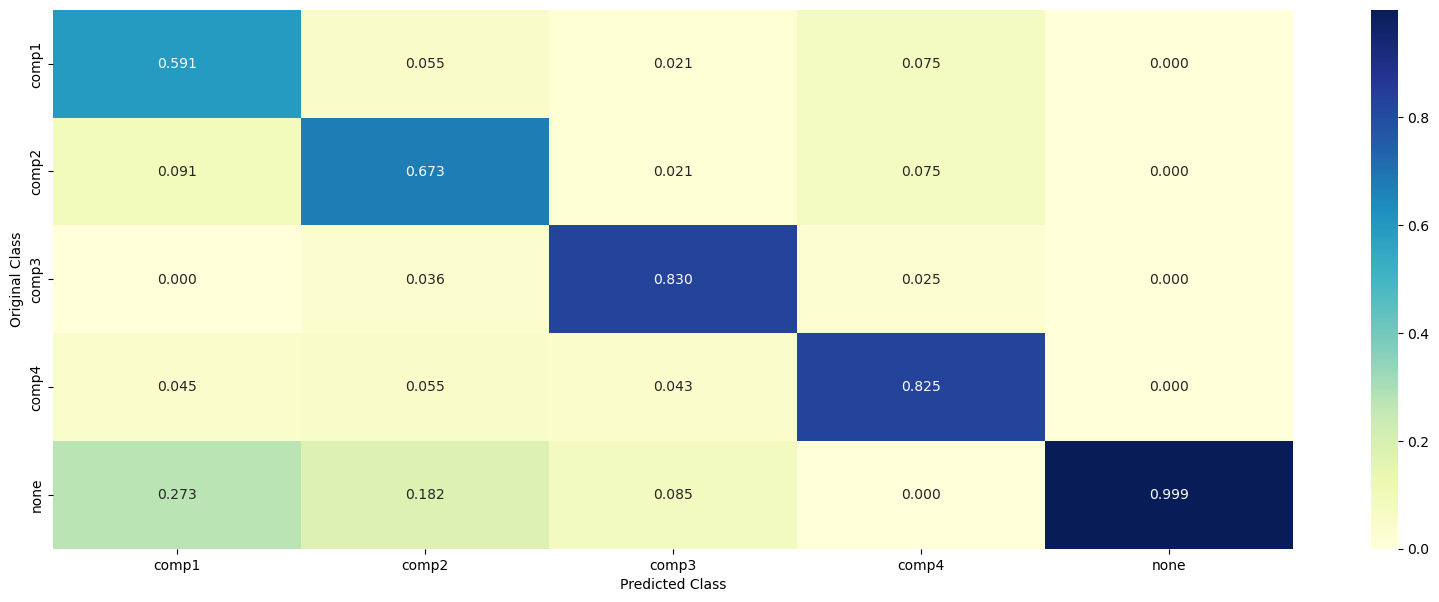

-------------------- Recall matrix (Row sum=1) --------------------


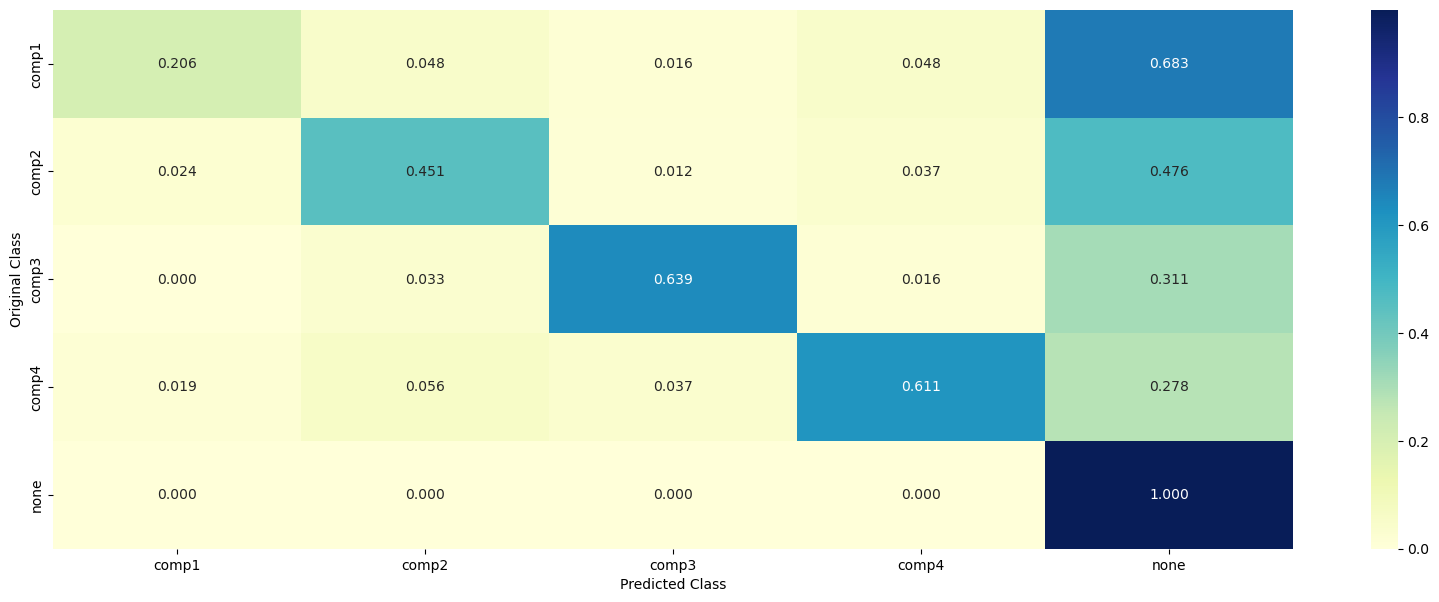

In [78]:
plot_confusion_matrix(y_test, r_cfl.predict(X_test))

In [79]:
from prettytable import PrettyTable

# Specify the Column Names
myTable = PrettyTable(["Model name (Recall score )", "comp1", "comp2", "comp3", 'comp4', 'none(no fail)'])

# Add rows
myTable.add_row(["Xgboost without hyper-parameter tuning", 
                 "0.206", "0.341", "0.705", "0.611", "1"])


myTable.add_row(["Random Forest without hyper-parameter tuning", 
                 "0.206", "0.476", "0.656", "0.556", "1"])


print(myTable)

+----------------------------------------------+-------+-------+-------+-------+---------------+
|          Model name (Recall score )          | comp1 | comp2 | comp3 | comp4 | none(no fail) |
+----------------------------------------------+-------+-------+-------+-------+---------------+
|    Xgboost without hyper-parameter tuning    | 0.206 | 0.341 | 0.705 | 0.611 |       1       |
| Random Forest without hyper-parameter tuning | 0.206 | 0.476 | 0.656 | 0.556 |       1       |
+----------------------------------------------+-------+-------+-------+-------+---------------+
